### Data Mining I - D209 NVM2_Task_1
   
### Classification Analysis

#### Student Name: Nikki Shrestha
#### Id No.: 010756950 
#### Mentor: Festus Elleh
#### Date: 01/27/2023

## Part I: Research Question

### A1. Research Question:
Which variables are most important to predict which customers are at high risk of churn? This question will be answered using the K-Nearest Neighbors algorithm (KNN).

### A2. Defined Goal:

Stakeholders in the organization will benefit from an analysis of the data because it gives a clear insight of which customers are at high risk of churn. This will help in better decision making which improve the business performance and also enhance the services to the customers.

## Part II: Method Justification

### B1. Explanation of Classification Method:

KNN predicts the label of any data point by looking at the k closest labeled data point and getting them to vote on what the unlabeled point should have. The new data point is then assigned the label of majority of 'k' closest points where 'k' is the number of nearest neighbors which is chosen by the model. I set my classifier to analyze the nearest 7 data points.  By the information found in the records and creating a test and training set, I can train the model with the data, and use the neighbor’s method to generate the next outcome. KNN will find the most similar data points in the training data. Test data will then be used to test the size of the models outcomes.

### B2. Summary of Method Assumption:

“The k-nearest neighbors algorithm is based on a very simple premise: That things that are close together have a lot in common.” (Harrison, 2018). One assumption is the KNN algorithm assumes that similar things exist in close proximity to each other. 

### B3. Packages or Libraries List:

The packages or libraries I have chosen for Python include:
- Pandas: A Pandas DataFrames are widely used in data science, machine learning, scientific computing, and many other data-intensive fields.It is a 2 dimensional data structure, like a 2 dimensional array, or a table with rows and columns.(https://www.w3schools.com)
- Numpy: NumPy is a Python library used for working with arrays. It also has functions for working in domain of linear algebra, fourier transform, and matrices. (https://www.w3schools.com)
- Matplotlib: Matplotlib is a cross-platform, data visualization and graphical plotting library for Python and its numerical extension NumPy. (htps://www.activestate.com)
- Seaborn: Seaborn provides high level interface and interactive visualizations.
- Scikit-learn: The Scikit-learn packages is used for splitting into train and test dataset, fitting, predicting & applying metrics for many machine learning models.

## Part III: Data Preparation

### C1. Data Preprocessing:

One data preprocessing goal relevant to the classification method from part A1 is creating dummy variables in order to encode categorical, yes/no data points into 1/0 numerical values. 

### C2. Dataset Variables:

Out of the 50 variables in the initial data set, 34 variables have been identified to be used in the classification analysis:

Continuous variables in the data set:

 - Children (Number of children)
 - Age (Age of customer as reported in sign-up information)
 - Bandwidth_GB_Year (Data usage in gigabytes)
 - Income (Annual income of customer)
 - Outage_sec_perweek (Average number of seconds per week of system outages in the customer’s neighborhood)
 - Email (Number of emails sent out to customer)
 - Contacts (Number of times customer contacted technical support)
 - Yearly_equip_failure (The number of times customer’s equipment failed and had to be reset/replaced in the past year)
 - MonthlyCharge (The amount charged to the customer monthly)
 - Tenure (Number of months the customer has stayed with the provider)


Categorical variables in the data set:

 - Churn (If the customer is likely to leave)
 - Contract (The contract term of the customer (month-to-month, one year, two year))
 - Device Protection (Whether the customer has device protection add-on (yes, no))
 - Gender (Customer self-identification as male, female, or nonbinary)
 - InternetService (Customer’s internet service provider (DSL, fiber optic, None))
 - Multiple (Whether the customer has multiple lines (yes, no))
 - OnlineBackup (Whether the customer has an online backup add-on (yes, no))
 - OnlineSecurity (Whether the customer has an online security add-on (yes, no))
 - PaperlessBilling  (Whether the customer has paperless billing (yes, no))
 - Phone (Whether the customer has a phone service (yes, no))
 - Port_modem (Whether the customer has a portable modem (yes, no))
 - StreamingMovies (Whether the customer has streaming movies (yes, no))
 - StreamingTV (Whether the customer has streaming TV (yes, no))
 - Tablet (Whether the customer owns a tablet such as iPad, Surface, etc. (yes, no))
 - Techie (Whether the customer considers themselves technically inclined (based on customer questionnaire when they signed up for services) (yes, no))
 - TechSupport (Whether the customer has a technical support add-on (yes, no))

Discrete variables in the data set:
 - Item1: Timely response
 - Item2: Timely fixes
 - Item3: Timely replacements
 - Item4: Reliability
 - Item5: Options
 - Item6: Respectful response
 - Item7: Courteous exchange
 - Item8: Evidence of active listening


### C3. Steps for Analysis:

 - Read the data set into Python using Pandas read_csv command.
 - Evaluate the data structure to gain a better understanding of the variables and data types.
 - Name the data set as "df_churn".
 - Rename the misleading variables.
 - Display dimension, shape and descriptive statistics of the data frame.
 - Drop the meaningless or irrelevant variables.
 - Check for the duplicate data using .duplicated() function and check for the null values using isnull() function.
 - Replace the missing values with measures of central tendency (mean, median, mode) using imputation method.
 - Check for the outliers using histogram or boxplot.
 - Create scatterplot to see the correlations between target and independent variables
 - Create dummy variables in order to encode categorical, yes/no data points into 1/0 numerical values as well as the ordinal variables being converted into numeric.
 - Remove less meaningful categorical variables from dataset to provide fully numerical dataframe for further analysis.
 - Extract cleaned dataset for use in K-Nearest Neighbor model.

In [3]:
# Standard data science imports
import numpy as np
import pandas as pd

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Statistics packages
import statsmodels.api as sm
import statistics
from scipy import stats

# Scikit-learn
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

# Ignore Warning Code
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load data set into Pandas dataframe
df_churn = pd.read_csv('churn_clean.csv')

# Rename last 8 survey columns for better description of variables
df_churn.rename(columns = {'Item1':'TimelyResponse',
'Item2':'Fixes',
'Item3':'Replacements',
'Item4':'Reliability',
'Item5':'Options',
'Item6':'Respectfulness',
'Item7':'Courteous',
'Item8':'Listening'},
inplace=True)

In [5]:
df_churn.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,TimelyResponse,Fixes,Replacements,Reliability,Options,Respectfulness,Courteous,Listening
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [6]:
#list column names
df_churn.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'TimelyResponse', 'Fixes', 'Replacements',
       'Reliability', 'Options', 'Respectfulness', 'Courteous', 'Listening'],
      dtype='object')

In [7]:
#Display the summary of the dataframe
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [8]:
# Display the dimension of dataframe
df_churn.shape

(10000, 50)

In [9]:
#Display descriptive statistics for each column.
df_churn.describe() 

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,...,MonthlyCharge,Bandwidth_GB_Year,TimelyResponse,Fixes,Replacements,Reliability,Options,Respectfulness,Courteous,Listening
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,...,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,...,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,...,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082812,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,...,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,...,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,...,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,...,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [10]:
# Display data types
df_churn.dtypes

CaseOrder                 int64
Customer_id              object
Interaction              object
UID                      object
City                     object
State                    object
County                   object
Zip                       int64
Lat                     float64
Lng                     float64
Population                int64
Area                     object
TimeZone                 object
Job                      object
Children                  int64
Age                       int64
Income                  float64
Marital                  object
Gender                   object
Churn                    object
Outage_sec_perweek      float64
Email                     int64
Contacts                  int64
Yearly_equip_failure      int64
Techie                   object
Contract                 object
Port_modem               object
Tablet                   object
InternetService          object
Phone                    object
Multiple                 object
OnlineSe

In [11]:
#Drop the less meaningful column 'Customer_id','Interaction', 'UID','CaseOrder','Zip','Lat', 'Lng', 'City','State','County','Zip','Population','Area', 'TimeZone', 'Job', 'Marital','PaymentMethod'.

df_churn = df_churn.drop(columns=['CaseOrder', 'Customer_id', 'Interaction','UID', 'City',
                                  'State', 'County', 'Zip', 'Lat', 'Lng','Population','Area', 
                                  'TimeZone', 'Job', 'Marital','PaymentMethod'])


In [12]:
# Display the dimension of dataframe
df_churn.shape

(10000, 34)

In [13]:
#Display descriptive statistics for each column.
df_churn.describe()

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,TimelyResponse,Fixes,Replacements,Reliability,Options,Respectfulness,Courteous,Listening
count,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [14]:
# count the duplicate data
df_churn.duplicated().value_counts()

False    10000
dtype: int64

In [15]:
# Display the number of null values
df_churn.isnull().sum()

Children                0
Age                     0
Income                  0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
Tenure                  0
MonthlyCharge           0
Bandwidth_GB_Year       0
TimelyResponse          0
Fixes                   0
Replacements            0
Reliability             0
Options                 0
Respectfulness          0
Courteous               0
Listening               0
dtype: int64

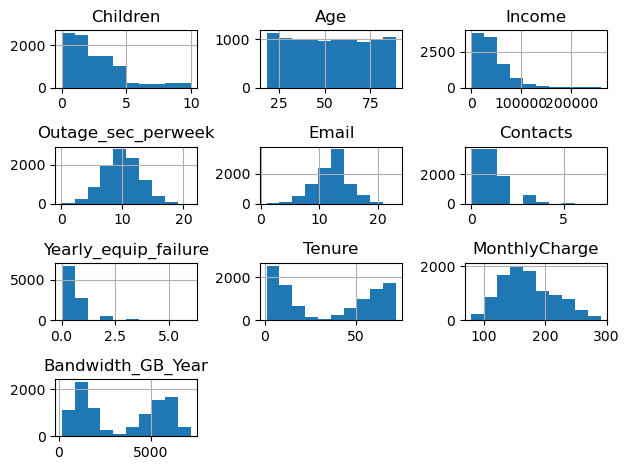

In [16]:
# Create histograms of continuous variables
df_churn[['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email','Contacts', 'Yearly_equip_failure', 'Tenure', 
          'MonthlyCharge','Bandwidth_GB_Year']].hist()
plt.tight_layout()

From the above histogram, we can see that Outage_sec_perweek, Email, and MonthlyCharge shows normal distribution whereas for Bandwidth_GB_Year and Tenure shows a bimodal distributions.

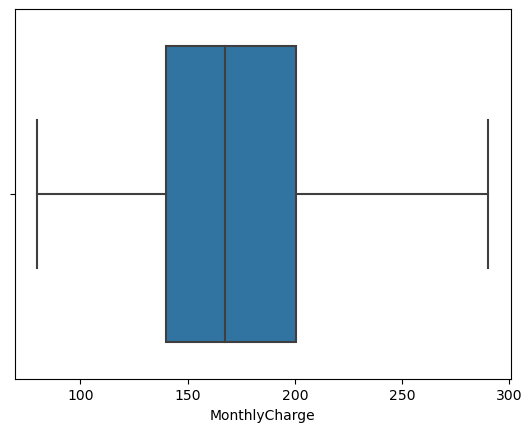

In [17]:
# Display boxplots for continuous variables MonthlyCharge, Bandwidth_GB_Year and Tenure
sns.boxplot('MonthlyCharge', data = df_churn)
plt.show()

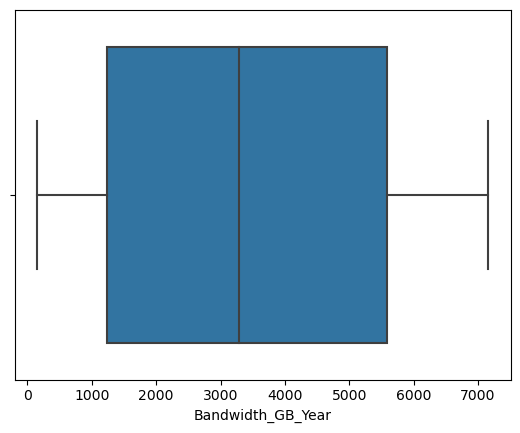

In [18]:
sns.boxplot('Bandwidth_GB_Year', data = df_churn)
plt.show()

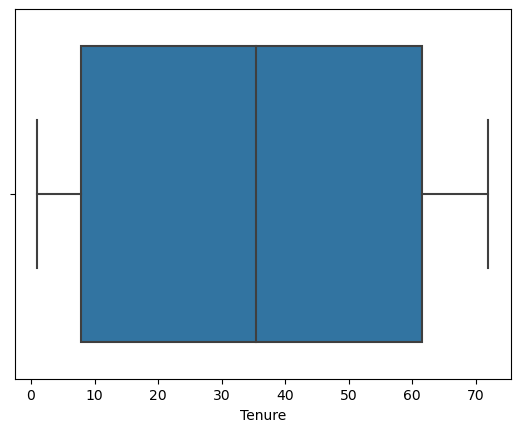

In [19]:
sns.boxplot('Tenure', data = df_churn)
plt.show()

From the above plot it shows that the anomolies has been removed and there is no outliers.

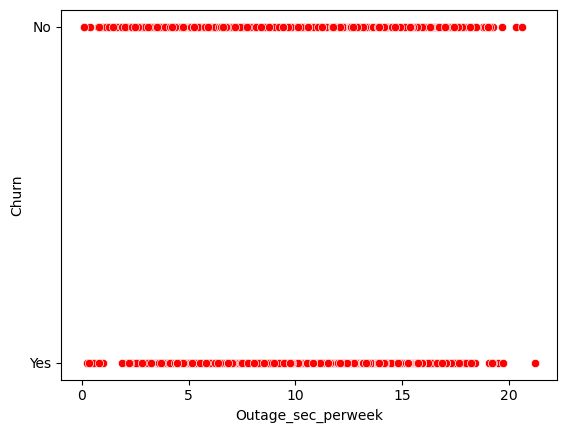

In [20]:
# Display scatterplot to show the relationship between the variables.
sns.scatterplot(x=df_churn['Outage_sec_perweek'], y=df_churn['Churn'], color='red')
plt.show();

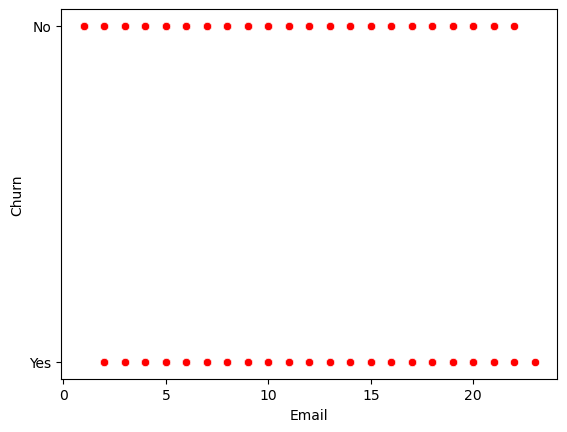

In [21]:
sns.scatterplot(x=df_churn['Email'], y=df_churn['Churn'], color='red')
plt.show();

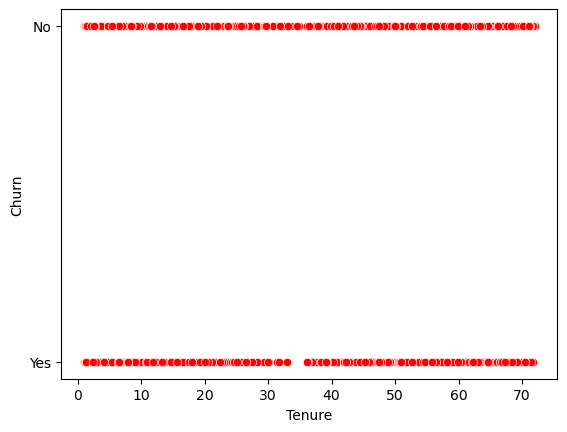

In [22]:
sns.scatterplot(x=df_churn['Tenure'], y=df_churn['Churn'], color='red')
plt.show();

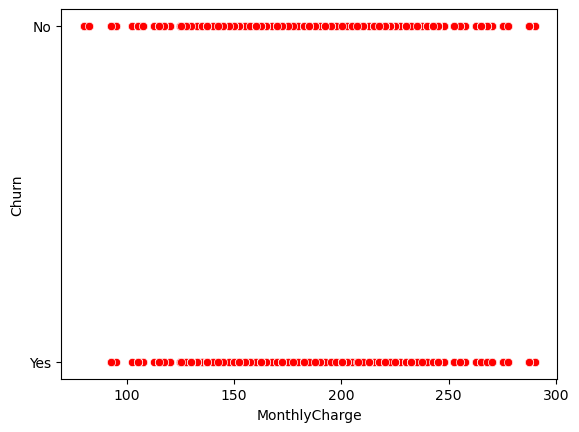

In [23]:
sns.scatterplot(x=df_churn['MonthlyCharge'], y=df_churn['Churn'], color='red')
plt.show();

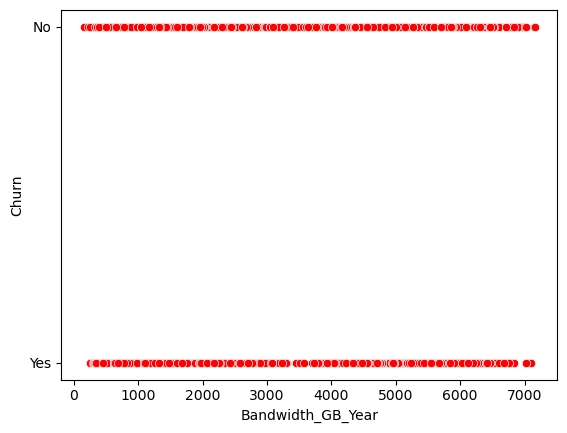

In [24]:
sns.scatterplot(x=df_churn['Bandwidth_GB_Year'], y=df_churn['Churn'], color='red')
plt.show();

From the above scatterplot, it shows that there is no correlation between the “Churn” and any other continuous variables.

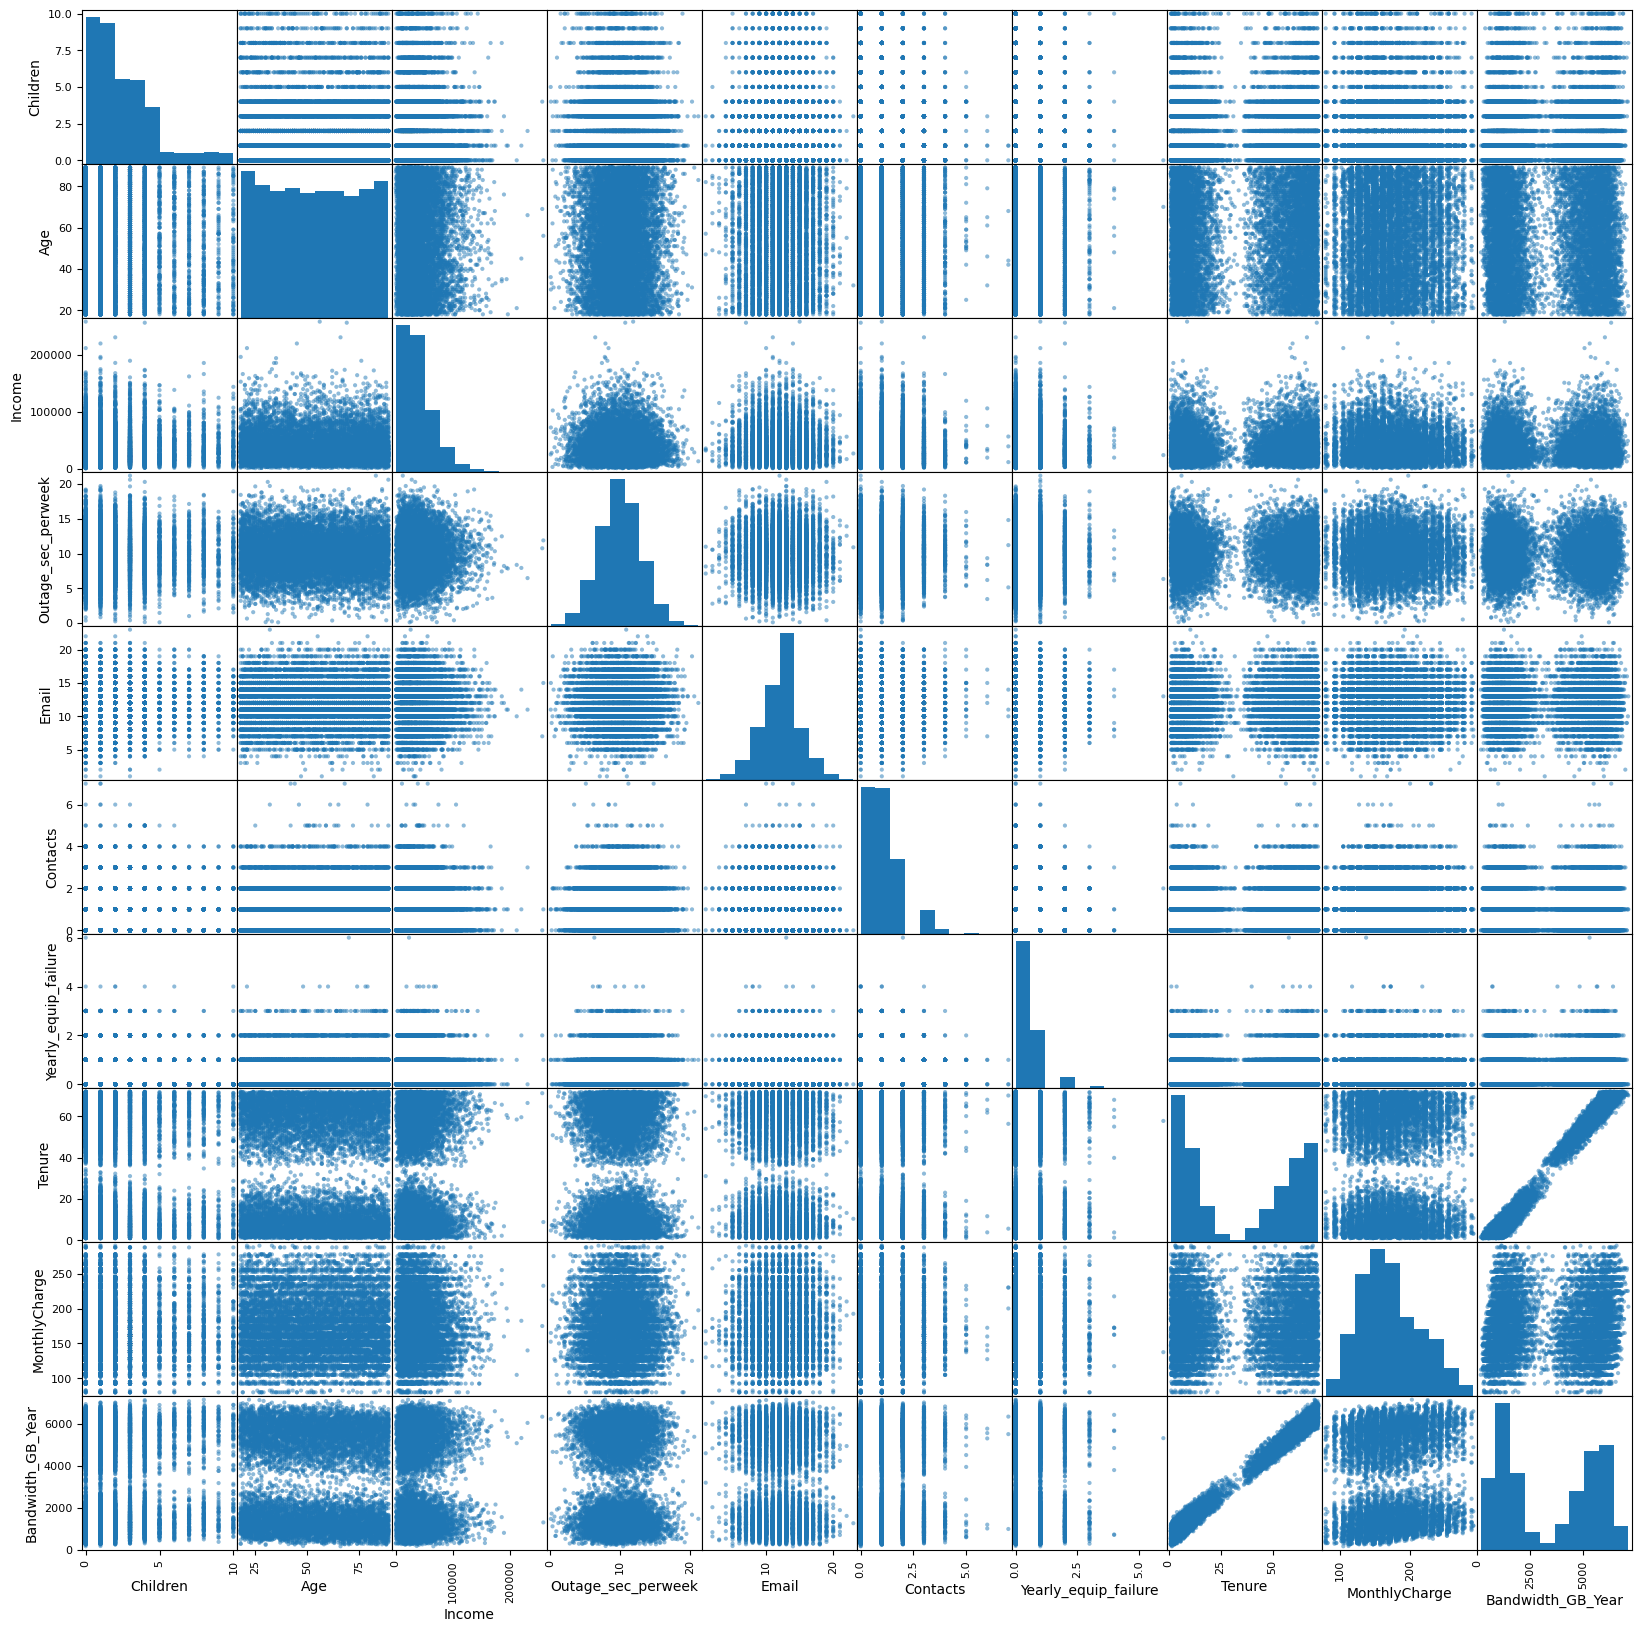

In [25]:
# Display a scatter matrix for continuous variables.
churn_continuous = df_churn[['Children', 'Age', 'Income', 'Outage_sec_perweek','Email', 'Contacts','Yearly_equip_failure', 
                          'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']]
pd.plotting.scatter_matrix(churn_continuous, figsize = [20, 20]);

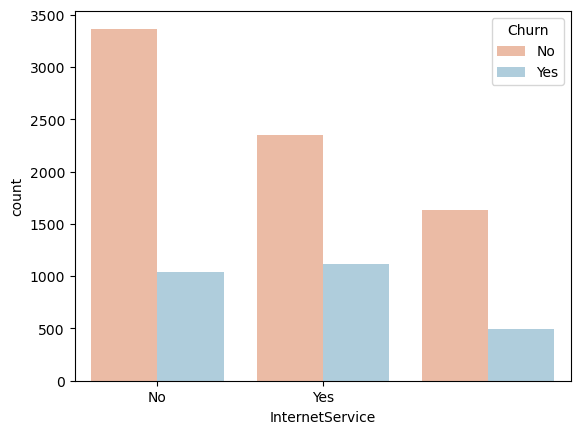

In [26]:
# Countplot of categorical variables.
plt.figure()
sns.countplot(x='InternetService', hue='Churn', data=df_churn, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

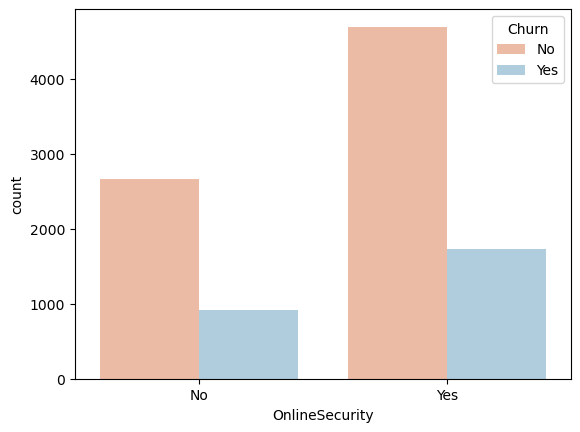

In [27]:
plt.figure()
sns.countplot(x='OnlineSecurity', hue='Churn', data=df_churn, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

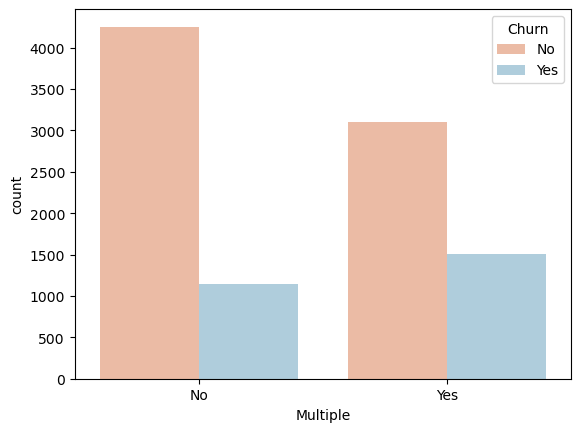

In [28]:
plt.figure()
sns.countplot(x='Multiple', hue='Churn', data=df_churn, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

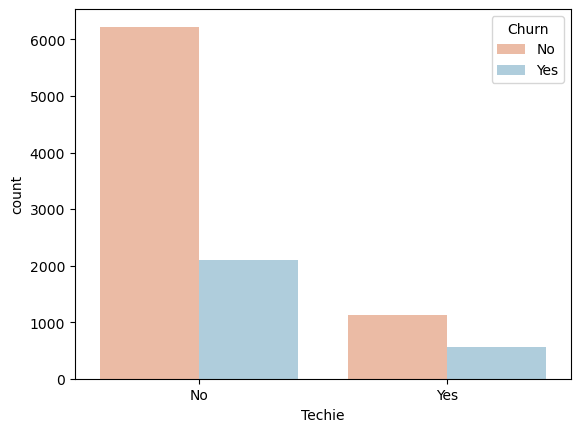

In [29]:
plt.figure()
sns.countplot(x='Techie', hue='Churn', data=df_churn, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

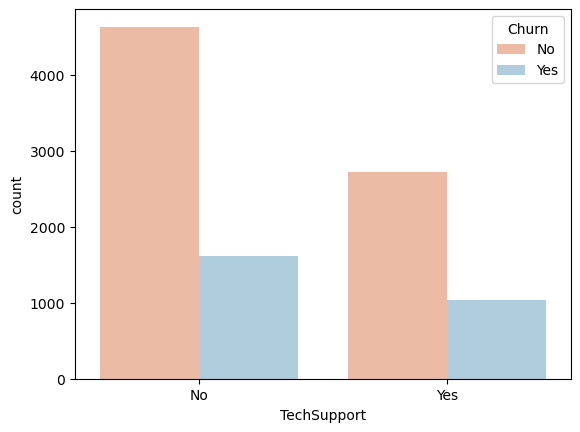

In [30]:
plt.figure()
sns.countplot(x='TechSupport', hue='Churn', data=df_churn, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

In [31]:
# Create dummy variables in order to encode categorical, yes/no data points into 1/0 numerical values.
df_churn['DummyGender'] = [1 if v == 'Male' else 0 for v in df_churn['Gender']]
df_churn['DummyChurn'] = [1 if v == 'Yes' else 0 for v in df_churn['Churn']]
df_churn['DummyTechie'] = [1 if v == 'Yes' else 0 for v in df_churn['Techie']]
df_churn['DummyContract'] = [1 if v == 'Two Year' else 0 for v in df_churn['Contract']]
df_churn['DummyPort_modem'] = [1 if v == 'Yes' else 0 for v in df_churn['Port_modem']]
df_churn['DummyTablet'] = [1 if v == 'Yes' else 0 for v in df_churn['Tablet']]
df_churn['DummyInternetService'] = [1 if v == 'Fiber Optic' else 0 for v in df_churn['InternetService']]
df_churn['DummyPhone'] = [1 if v == 'Yes' else 0 for v in df_churn['Phone']]
df_churn['DummyMultiple'] = [1 if v == 'Yes' else 0 for v in df_churn['Multiple']]
df_churn['DummyOnlineSecurity'] = [1 if v == 'Yes' else 0 for v in df_churn['OnlineSecurity']]
df_churn['DummyOnlineBackup'] = [1 if v == 'Yes' else 0 for v in df_churn['OnlineBackup']]
df_churn['DummyDeviceProtection'] = [1 if v == 'Yes' else 0 for v in df_churn['DeviceProtection']]
df_churn['DummyTechSupport'] = [1 if v == 'Yes' else 0 for v in df_churn['TechSupport']]
df_churn['DummyStreamingTV'] = [1 if v == 'Yes' else 0 for v in df_churn['StreamingTV']]
df_churn['StreamingMovies'] = [1 if v == 'Yes' else 0 for v in df_churn['StreamingMovies']]
df_churn['DummyPaperlessBilling'] = [1 if v == 'Yes' else 0 for v in df_churn['PaperlessBilling']]

In [32]:
# Drop original categorical features from dataframe
df_churn = df_churn.drop(columns=['Gender', 'Churn', 'Techie', 'Contract','Port_modem', 'Tablet','InternetService', 
                                'Phone', 'Multiple','OnlineSecurity','OnlineBackup', 'DeviceProtection','TechSupport',
                                'StreamingTV', 'StreamingMovies','PaperlessBilling'])

In [33]:
df_churn.shape

(10000, 33)

### C4. Cleaned Dataset:

In [34]:
#Save prepared dataset as new files.
df_churn.to_csv('clean_churn.csv')

Cleaned data set is extracted as "clean_churn.csv" for further analysis.

## Part IV: Analysis

### D1. Splitting the Data

In [35]:
# load the dataset
df = pd.read_csv('clean_churn.csv')

In [36]:
# Create arrays for features & target variable
X = df.drop('DummyChurn', axis=1).values
y = df['DummyChurn'].values

In [37]:
# Split the data into training and test data sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify = y)

In [38]:
# Export X_train dataset
X_train = pd.DataFrame(X_train)
X_train.to_csv('X_train.csv')

In [39]:
# Export X_test dataset
X_test = pd.DataFrame(X_test)
X_test.to_csv('X_test.csv')

In [40]:
# Export y_train dataset
y_train = pd.DataFrame(y_train)
y_train.to_csv('y_train.csv')

In [41]:
# Export y_test dataset
y_test = pd.DataFrame(y_test)
y_test.to_csv('y_test.csv')

### D2. Output & Intermediate Calculations

 - Once I created training and test data sets, I then fit the data sets into the model and create a new array called: y_pred. 
 - Once I have split data into training and test datasets and export it as anew files, then fit the data sets into the model and created a new array called: y_pred and export it into y_pred dataset.
 - The analysis technique I used to appropriately analyze the data is by computing accuracy score of the k nearest neighbors model.
 - Then I checked if I can create more accurate model if the datasets are scaled to make sure that we have analyzed the model. This will help to determine if the model is performing as needed.
 - I have also included the annotated code and calculations below:

In [42]:
# Create a KNN classifier with 7 neighbors.
knn = KNeighborsClassifier(n_neighbors = 7)

In [43]:
# Fit classifier to training data.
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [44]:
# Predict on test data.
y_pred = knn.predict(X_test)

In [45]:
# Export y_pred dataset
y_pred = pd.DataFrame(y_pred)
y_pred.to_csv('y_pred.csv')

In [46]:
# Print accuracy score of KNN model
print("Accuracy score of KNN model: ", accuracy_score(y_test, y_pred))

Accuracy score of KNN model:  0.751


In [47]:
# Generate classifcation report and confusion matrix.
print("Classification report:\n", classification_report(y_test, y_pred))

cf_matrix= confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cf_matrix)

Classification report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84      1470
           1       0.54      0.43      0.48       530

    accuracy                           0.75      2000
   macro avg       0.67      0.65      0.66      2000
weighted avg       0.74      0.75      0.74      2000

Confusion matrix:
 [[1272  198]
 [ 300  230]]


In [48]:
# Performance metrics calculating accuracy, sensitivity and specificity.
total=sum(sum(cf_matrix))

accuracy =(cf_matrix[0,0]+cf_matrix[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[0,1])
print('Sensitivity : ', sensitivity )

specificity = cf_matrix[1,1]/(cf_matrix[1,0]+cf_matrix[1,1])
print('Specificity : ', specificity)

Accuracy :  0.751
Sensitivity :  0.8653061224489796
Specificity :  0.4339622641509434


In [49]:
# Set steps for pipeline object
steps = [('scaler', StandardScaler()),
('knn', KNeighborsClassifier())]

In [50]:
# Instantiate pipeline
pipeline = Pipeline(steps)

In [51]:
# Split dataframe
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X, y, test_size = 0.2, random_state = 42)
                                                                                

In [52]:
# Scale dateframe with pipeline object
knn_scaled = pipeline.fit(X_train_scaled, y_train_scaled)

In [53]:
# Predict from scaled dataframe
y_pred_scaled = pipeline.predict(X_test_scaled)

In [54]:
# Export y_pred_scaled dataset
y_pred_scaled = pd.DataFrame(y_pred_scaled)
y_pred_scaled.to_csv('y_pred_scaled.csv')

In [55]:
# Print new accuracy score of scaled KNN model
print("New accuracy score of scaled KNN model: ", accuracy_score(y_test_scaled, y_pred_scaled))

New accuracy score of scaled KNN model:  0.8155


In [56]:
# Generate classifcation report and confusion matrix after scaling.
print("Classification report after scaling:\n", classification_report(y_test_scaled, y_pred_scaled))


Classification report after scaling:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1456
           1       0.70      0.56      0.62       544

    accuracy                           0.82      2000
   macro avg       0.77      0.74      0.75      2000
weighted avg       0.81      0.82      0.81      2000



In [57]:
cf_matrix_scaled = confusion_matrix(y_test_scaled, y_pred_scaled)
print("Confusion matrix scaled:\n", cf_matrix_scaled)

Confusion matrix scaled:
 [[1324  132]
 [ 237  307]]


In [58]:
# Performance metrics calculating accuracy, sensitivity and specificity after scaling.
total_scaled=sum(sum(cf_matrix_scaled))

accuracy_scaled =(cf_matrix_scaled[0,0]+cf_matrix_scaled[1,1])/total_scaled
print ('Accuracy scaled : ', accuracy_scaled)

sensitivity_scaled = cf_matrix_scaled[0,0]/(cf_matrix_scaled[0,0]+cf_matrix_scaled[0,1])
print('Sensitivity scaled : ', sensitivity_scaled )

specificity_scaled = cf_matrix_scaled[1,1]/(cf_matrix_scaled[1,0]+cf_matrix_scaled[1,1])
print('Specificity scaled : ', specificity_scaled)

Accuracy scaled :  0.8155
Sensitivity scaled :  0.9093406593406593
Specificity scaled :  0.5643382352941176


### D3. Code Execution

All codes are above.

## Part V: Data Summary and Implications

### E1. Accuracy & AUC

#### Accuracy:

Classification accuracy is the number of correct predictions made as the ratio of all predictions. (Brownlee, 2018).
Accuracy is one of the simplest metrics available to us for classification models. It is the number of correct predictions as a percentage of the number of observations in the dataset. The score ranges from 0% to 100%, where 100% is a perfect score and 0% is the worst. (https://stephenallwright.com)

The first model has accuracy of 0.75 and precision score of 0.81, where after scaling the model has accuracy of 0.82 and precision of 0.85. It appears that scaling improved model performance from an accuracy 0.75 to 0.82. The accuracy score is the ratio of true positive and true negative which tell us how often we can expect the model will correctly predict the outcome. 

#### AUC:

AUC stands for Area Under the Receiver Operating Characteristic Curve. The score it produces ranges from 0.5 to 1 where 1 is the best score and 0.5 means the model is as good as random. (https://stephenallwright.com). Our model has an area under curve of 0.70.

In [59]:
# Set up parameters grid
param_grid = {'n_neighbors': np.arange(1, 50)}

In [60]:
# intantiate KNN classifier
knn = KNeighborsClassifier()

In [61]:
# Instantiate GridSearch cross validation
knn_cv = GridSearchCV(knn , param_grid, cv=5)

In [62]:
# Fit model to training data
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [63]:
# Print the optimal parameters
print('Tuned KNN parameters: {}'.format(knn_cv.best_params_))

Tuned KNN parameters: {'n_neighbors': 2}


In [64]:
# Generate model best score
print('Best score for this KNN model: {:.3f}'.format(knn_cv.best_score_))

Best score for this KNN model: 0.729


In [65]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = knn_cv.predict_proba(X_test)[:,1]

In [66]:
# Compute and print AUC score
print("The Area under curve (AUC) :{}".format(roc_auc_score(y_test, y_pred_prob)))

The Area under curve (AUC) :0.6950462071621102


In [67]:
# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(knn_cv, X, y, cv=5, scoring='roc_auc')

In [68]:
# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC scores computed using 5-fold cross-validation: [0.68120909 0.17406045 0.96370684 0.96560711 0.58834745]


### E2. Results & Implications

The first model has accuracy of 0.75 and precision score of 0.81, where after scaling the model has accuracy of 0.81 and precision of 0.85. The accuracy score is the ratio of true positive and true negative which tell us how often we can expect the model will correctly predict the outcome. The score to aim is 1 which means there is 100% chance of being accurate on prediction. So the model is 81% chance of being accurate.

The precision score is a useful measure of the success of prediction when the classes are very imbalanced. It represents the ratio of true positive to the sum of true positive and false positive (https://vitalflux.com). The precision score is 0.85 which means that this model is 85% precise on being successful.

###  Sources for Third-Party Code

How to measure the accuracy of knn classifier in python.(n.d). Retrived from https://stackoverflow.com/questions/15821116/how-to-measure-the-accuracy-of-knn-classifier-in-python

Calculating Sensitivity and Specificity in Python. (n.d). Retrieved from https://statinfer.com/204-4-2-calculating-sensitivity-and-specificity-in-python/

###  Sources

 Ajitesh Kumar(December 6, 2022). Accuracy, Precision, Recall & F1-Score – Python Examples.https://vitalflux.com/accuracy-precision-recall-f1-score-python-example/

Stephen Allwright. (Jun 28, 2022). AUC vs accuracy, which is the best metric? Retrieved from
https://stephenallwright.com/auc-vs-accuracy/

Onel Harrison. (Sep 10, 2018). Machine Learning Basics with the K-Nearest Neighbors Algorithm. Retrieved from 
https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761

Peter Grant. (Jul 21, 2019). Introducing k-Nearest Neighbors. Retrieved from https://towardsdatascience.com/introducing-k-nearest-neighbors-7bcd10f938c5

NumPy Introduction. (n.d). Retrieved from https://www.w3schools.com/python/numpy/numpy_intro.asp

What Is Matplotlib In Python? (n.d). Retrieved from https://www.activestate.com/resources/quick-reads/what-is-matplotlib-in-python-how-to-use-it-for-plotting/

Brownlee. (2018). Metrics To Evaluate Machine Learning Algorithms in Python https://machinelearningmastery.com/metrics-evaluate-machine-learning-algorithms-python/